In [1]:
import os
import sys
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType,StringType,DoubleType
from pyspark.ml.evaluation import ClusteringEvaluator
from subprocess import PIPE, Popen
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
spark = SparkSession.builder.getOrCreate()

In [2]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler,StandardScaler
# Loads data.
dataset4 = spark.read.csv("hdfs://localhost:9000/spark_output/Kmean4.csv", sep=',' ,lineSep= '\r\n',header=True) #carriage return (con trỏ về đầu dòng)
dataset5 = spark.read.csv("hdfs://localhost:9000/spark_output/Kmean5.csv", sep=',' ,lineSep= '\r\n',header=True)

dataset4 = dataset4.withColumn("CustomerNo", dataset4["CustomerNo"].cast(IntegerType()))
dataset4 = dataset4.withColumn("CustomerNo", dataset4["CustomerNo"].cast(StringType()))
dataset4 = dataset4.withColumn("TotalQuantity", dataset4["TotalQuantity"].cast(IntegerType()))
dataset4 = dataset4.withColumn("TotalMoney", dataset4["TotalMoney"].cast(DoubleType()))
dataset4 = dataset4.withColumn("prediction", dataset4["prediction"].cast(IntegerType()))

dataset5 = dataset5.withColumn("CustomerNo", dataset5["CustomerNo"].cast(IntegerType()))
dataset5 = dataset5.withColumn("CustomerNo", dataset5["CustomerNo"].cast(StringType()))
dataset5 = dataset5.withColumn("TotalQuantity", dataset5["TotalQuantity"].cast(IntegerType()))
dataset5 = dataset5.withColumn("TotalMoney", dataset5["TotalMoney"].cast(DoubleType()))
dataset5 = dataset5.withColumn("prediction", dataset5["prediction"].cast(IntegerType()))

In [3]:
dataset4 = dataset4.toPandas()
dataset4.head()
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerNo     4718 non-null   object 
 1   TotalQuantity  4718 non-null   int32  
 2   TotalMoney     4718 non-null   float64
 3   prediction     4718 non-null   int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 110.7+ KB


In [4]:
dataset5 = dataset5.toPandas()
dataset5.head()

,CustomerNo,TotalQuantity,TotalMoney,prediction
0,12004,104,1509.60,0
1,12006,2,24.76,0
2,12008,421,5689.57,0
3,12013,3,69.96,0
4,12024,14,149.52,0


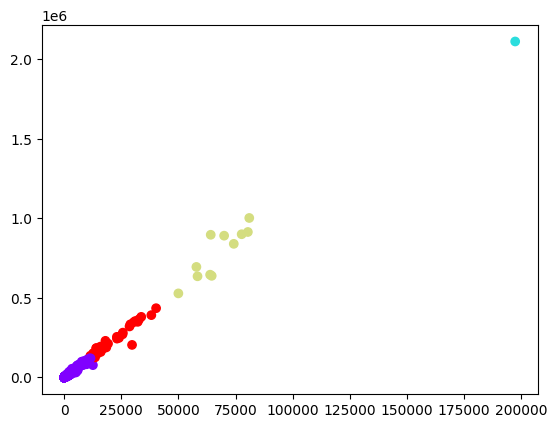

In [5]:
import matplotlib.pyplot as plt
plt.scatter(dataset4['TotalQuantity'],dataset4['TotalMoney'],c=dataset4['prediction'],cmap='rainbow')

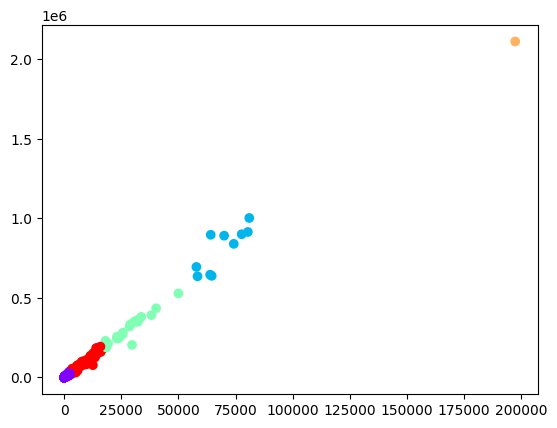

In [6]:
plt.scatter(dataset5['TotalQuantity'],dataset5['TotalMoney'],c=dataset5['prediction'],cmap='rainbow')